In [1]:
import sys
sys.path.append('../')
sys.path.append('/Users/sdbykov/work/my_packages/nway')

In [10]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import fits_to_pandas, pandas_to_fits, assess_goodnes_nway_cross_match, assess_goodnes_of_cross_match
import pandas as pd
import numpy as np
import seaborn as sns
import nway_python_api as nway
%matplotlib inline

# Nway run in photometric prior mode

In [3]:
magnitude_columns = [
                    ('nnmag_grz', '../1_desi-photo-prior/model/nnmag_grz.csv'),
                    ('nnmag_grzw1', '../1_desi-photo-prior/model/nnmag_grzw1.csv'),
                    ('nnmag_grzw1w2', '../1_desi-photo-prior/model/nnmag_grzw1w2.csv'),
                    ('rel_dered_mag_g', '../1_desi-photo-prior/model/rel_dered_mag_g.csv'),
                    ('rel_dered_mag_r', '../1_desi-photo-prior/model/rel_dered_mag_r.csv'),
                    ('rel_dered_mag_z', '../1_desi-photo-prior/model/rel_dered_mag_z.csv'),
                    ('rel_dered_g_r', '../1_desi-photo-prior/model/rel_dered_g_r.csv'),
                    ('rel_dered_r_z', '../1_desi-photo-prior/model/rel_dered_r_z.csv'),
                    ('rel_dered_g_z', '../1_desi-photo-prior/model/rel_dered_g_z.csv'),
                    # 
                    ]

ero_table = nway.table_from_fits(data_path+'ERO_lhpv_03_23_sd01_a15_g14.fits')
desi_table = nway.table_from_fits(data_path+'desi_lh.fits', poserr_value=0.1, magnitude_columns=magnitude_columns)
ero_pandas = fits_to_pandas('ERO_lhpv_03_23_sd01_a15_g14.fits')
desi_pandas = fits_to_pandas('desi_lh.fits')

ero_ctps_pandas = pd.read_pickle(data_path+'validation_ctps_ero_desi_lh.pkl')
ero_pandas = ero_pandas.merge(ero_ctps_pandas, on='ID', how='left')

nway_args = {'match_radius':30, 'prior_completeness':1,'mag_include_radius': 5.0,
'store_mag_hists': True,}

ero_pandas


,EROSITA,ID,RA,DEC,pos_err,ML_FLUX_0,desi_id_true_ctp
0,0,b'SRGe J103744.3+571156',159.434594,57.198788,0.729711,3.284168e-12,NaN
1,1,b'SRGe J110137.5+572926',165.406353,57.490464,0.766567,1.969860e-12,NaN
2,2,b'SRGe J110537.6+585120',166.406669,58.855424,0.742422,1.505411e-12,NaN
3,3,b'SRGe J102349.9+563347',155.958041,56.563186,0.724683,1.001123e-12,NaN
4,4,b'SRGe J105057.2+593215',162.738144,59.537414,0.729755,9.137326e-13,NaN
...,...,...,...,...,...,...,...
9210,9210,b'SRGe J102315.1+561957',155.813071,56.332561,4.389278,1.637604e-15,NaN
9211,9211,b'SRGe J102332.5+562524',155.885436,56.423270,3.578448,1.608667e-15,NaN
9212,9212,b'SRGe J102235.0+561919',155.645874,56.321872,3.361668,1.595806e-15,NaN
9213,9213,b'SRGe J102223.5+562357',155.597875,56.399058,3.662990,1.532857e-15,NaN


    adding angular separation columns
matching: 145069 matches after filtering by search radius
Primary catalogue "EROSITA" (9215), density gives 2.10e+07 objects on entire sky
Catalogue "DESI" (2418574), density gives 2.39e+09 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 9215/9215 [00:02<00:00, 3409.15it/s]
Incorporating bias "DESI:nnmag_grz" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnmag_grz"


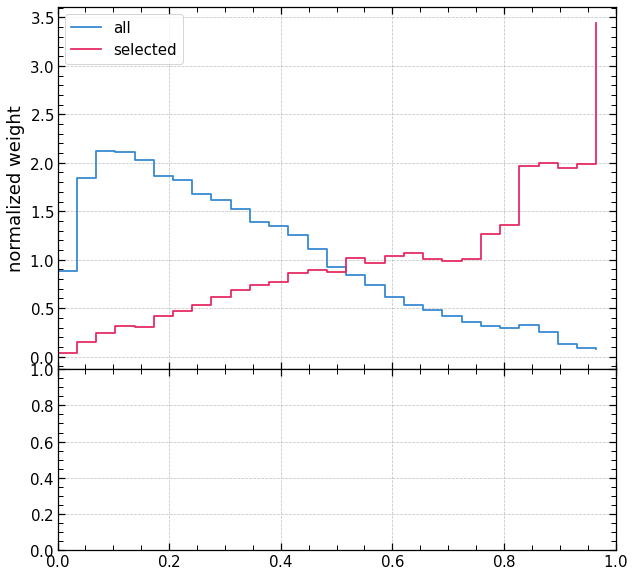

Incorporating bias "DESI:nnmag_grzw1" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnmag_grzw1"


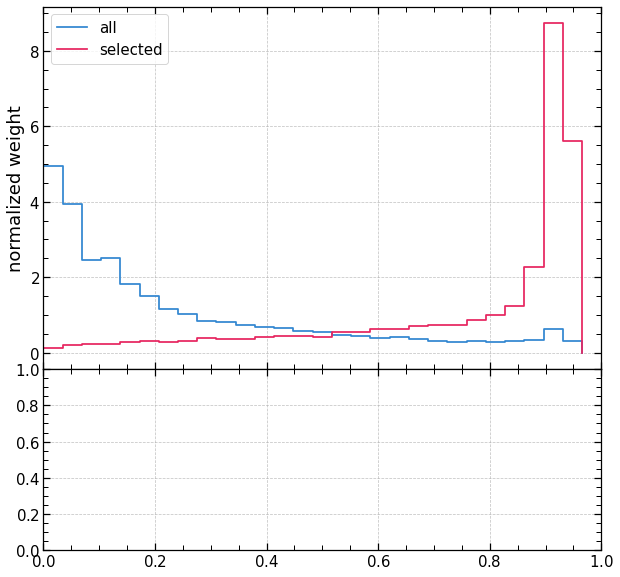

Incorporating bias "DESI:nnmag_grzw1w2" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnmag_grzw1w2"


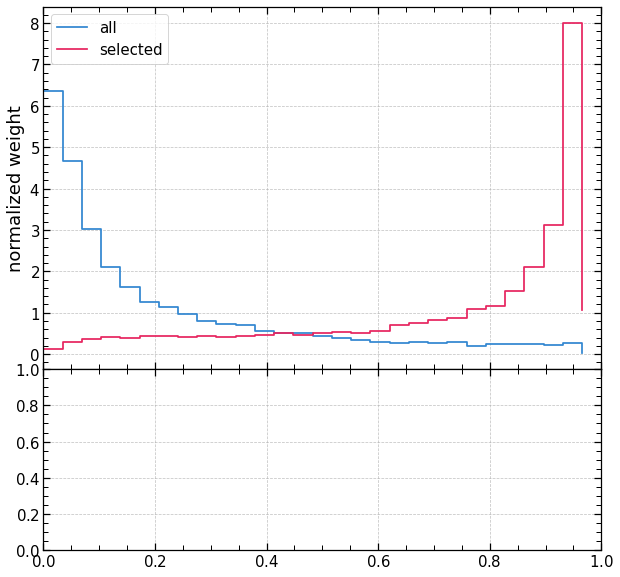

Incorporating bias "DESI:rel_dered_mag_g" ...
magnitude histogramming: using user-supplied histogram for "DESI_rel_dered_mag_g"


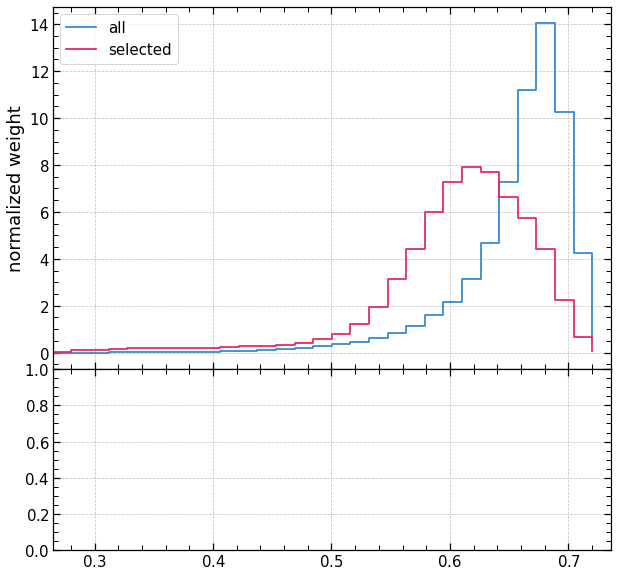

Incorporating bias "DESI:rel_dered_mag_r" ...
magnitude histogramming: using user-supplied histogram for "DESI_rel_dered_mag_r"


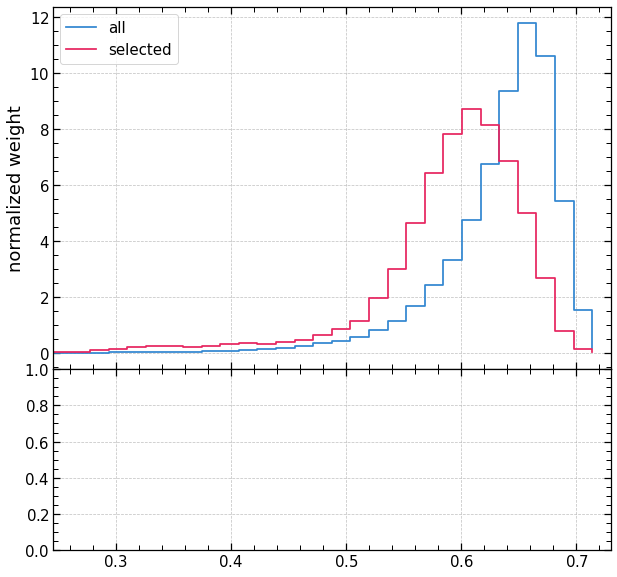

Incorporating bias "DESI:rel_dered_mag_z" ...
magnitude histogramming: using user-supplied histogram for "DESI_rel_dered_mag_z"


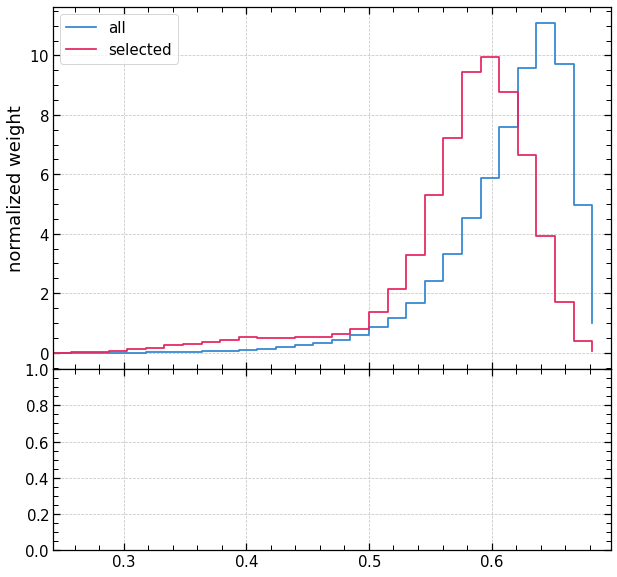

Incorporating bias "DESI:rel_dered_g_r" ...
magnitude histogramming: using user-supplied histogram for "DESI_rel_dered_g_r"


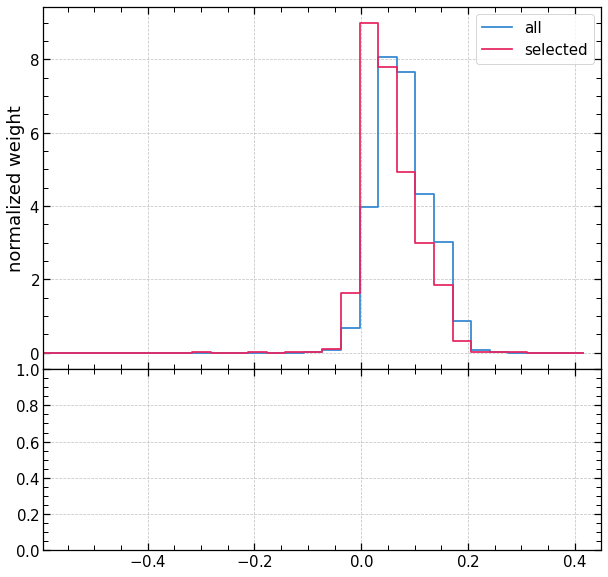

Incorporating bias "DESI:rel_dered_r_z" ...
magnitude histogramming: using user-supplied histogram for "DESI_rel_dered_r_z"


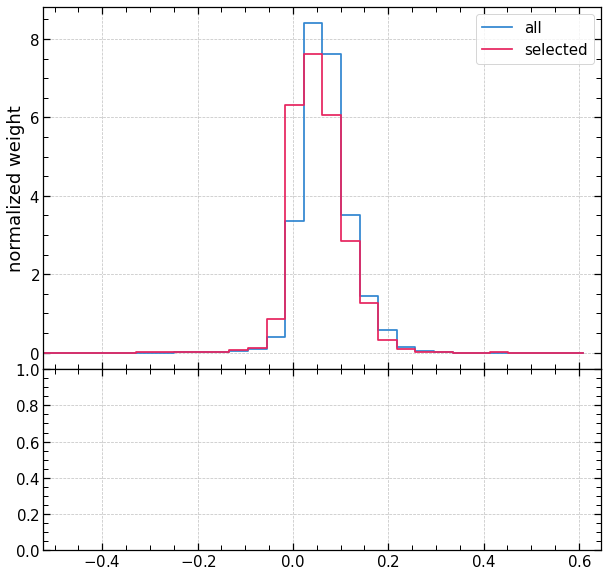

/Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py:376: RuntimeWarning: divide by zero encountered in log10
  weights = log10(func(magcol))
Incorporating bias "DESI:rel_dered_g_z" ...
magnitude histogramming: using user-supplied histogram for "DESI_rel_dered_g_z"


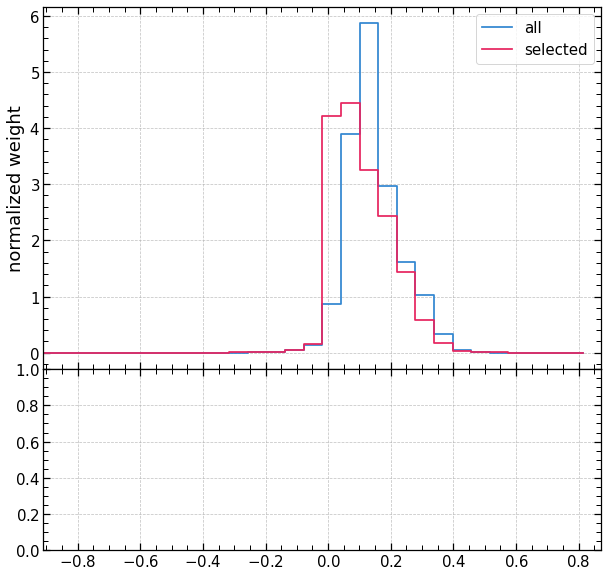


Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...


In [4]:

nway_res_ero = nway.nwaylib.nway_match(
[ero_table, desi_table],
**nway_args
)


In [6]:
os.system('rm DESI*_fit.txt')

rm: DESI*_fit.txt: No such file or directory


256

In [6]:

# nway_res_ero_random = nway.nwaylib.nway_match(
# [ero_random_table, desi_table],
# **nway_args
# )
#cutoffs, _, nway_purity = nway.calibrate_cutoff(nway_res_ero, nway_res_ero_random)


In [7]:
nway_res_ero  = nway_res_ero.merge(ero_pandas, on='EROSITA')
nway_res_ero  = nway_res_ero.merge(desi_pandas, on='DESI')
nway_res_ero.sort_values(by=['EROSITA', 'prob_this_match' ], inplace=True, ascending=[True, False])
nway_res_ero.to_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_nway.pkl')

In [8]:
nway_res_ero


,EROSITA,DESI,Separation_EROSITA_DESI,Separation_max,ncat,dist_bayesfactor_uncorrected,dist_bayesfactor,dist_post,bias_DESI_nnmag_grz,bias_DESI_nnmag_grzw1,bias_DESI_nnmag_grzw1w2,bias_DESI_rel_dered_mag_g,bias_DESI_rel_dered_mag_r,bias_DESI_rel_dered_mag_z,bias_DESI_rel_dered_g_r,bias_DESI_rel_dered_r_z,bias_DESI_rel_dered_g_z,p_single,match_flag,prob_has_match,prob_this_match,ID,RA,DEC,pos_err,ML_FLUX_0,desi_id_true_ctp,desi_id,ra,dec,rel_dered_mag_g,rel_dered_mag_r,rel_dered_mag_z,rel_dered_mag_w1,rel_dered_mag_w2,rel_dered_mag_w3,rel_dered_mag_w4,rel_dered_g_r,rel_dered_r_z,rel_dered_g_z,rel_dered_z_w1,rel_dered_r_w2,rel_dered_w1_w2,rel_dered_z_w3,rel_dered_r_w4,rel_dered_w3_w4,prior_type,nnmag_grzw1w2,nnmag_grzw1w2_orig,nnmag_grzw1,nnmag_grzw1_orig,nnmag_grz,nnmag_grz_orig,rel_dered_mag_g_orig,rel_dered_mag_r_orig,rel_dered_mag_z_orig,rel_dered_mag_w1_orig,rel_dered_mag_w2_orig,rel_dered_mag_w3_orig,rel_dered_mag_w4_orig,rel_dered_g_r_orig,rel_dered_r_z_orig,rel_dered_g_z_orig,rel_dered_z_w1_orig,rel_dered_r_w2_orig,rel_dered_w1_w2_orig,rel_dered_z_w3_orig,rel_dered_r_w4_orig,rel_dered_w3_w4_orig
0,0,10477,0.042512,0.042512,2,11.194774,11.194774,9.849608e-01,1.000000,1.000000,28.535635,1.000000,1.000000,1.000000,1.000000,1.0,1.0,9.994652e-01,1,0.999465,1.000000e+00,b'SRGe J103744.3+571156',159.434594,57.198788,0.729711,3.284168e-12,NaN,b'9011_609162_1184',159.434616,57.198786,-99.000000,-99.000000,-99.00000,-99.0,-99.0,0.407712,0.382073,-99.000000,-99.0,-99.0,-99.0,-99.0,-99.0,0.134679,0.273902,0.089736,b'grzw1w2',0.965787,0.965787,-99.000000,0.933825,-99.000000,0.989550,16.058165,16.111576,15.616705,14.459218,14.227020,14.269917,13.372561,-0.053411,0.494871,0.441460,1.157487,1.884556,0.232198,1.346788,2.739015,0.897356
17,0,2289777,9.399113,9.399113,2,-24.167198,-24.167198,2.845910e-34,1.000000,1.000000,1.000000,1.000000,1.000000,0.176453,1.000000,1.0,1.0,5.021689e-35,0,0.999465,2.687006e-38,b'SRGe J103744.3+571156',159.434594,57.198788,0.729711,3.284168e-12,NaN,b'9011_609162_1223',159.439360,57.199177,-99.000000,-99.000000,0.65618,-99.0,-99.0,-99.000000,-99.000000,-99.000000,-99.0,-99.0,-99.0,-99.0,-99.0,-99.000000,-99.000000,-99.000000,b'None',-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,NaN,NaN,22.966312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0,784835,9.507520,9.507520,2,-24.987633,-24.987633,4.303153e-35,1.000000,1.000000,0.620873,1.000000,1.000000,1.000000,1.000000,1.0,1.0,2.671712e-35,0,0.999465,1.429580e-38,b'SRGe J103744.3+571156',159.434594,57.198788,0.729711,3.284168e-12,NaN,b'9011_609162_1210',159.437965,57.200696,-99.000000,-99.000000,-99.00000,-99.0,-99.0,0.503986,-99.000000,-99.000000,-99.0,-99.0,-99.0,-99.0,-99.0,0.540583,-99.000000,-99.000000,b'grzw1w2',0.350617,0.350617,-99.000000,0.597174,-99.000000,0.436775,23.338484,23.416210,23.045345,21.072514,21.045940,17.639517,NaN,-0.077726,0.370865,0.293139,1.972831,2.370270,0.026574,5.405828,NaN,NaN
12,0,1418906,10.924277,10.924277,2,-36.574707,-36.574707,1.113557e-46,1.000000,1.000000,1.000000,0.313535,0.143192,1.000000,2.435905,1.0,1.0,1.217805e-47,0,0.999465,6.516233e-51,b'SRGe J103744.3+571156',159.434594,57.198788,0.729711,3.284168e-12,NaN,b'9011_609162_1191',159.435390,57.201792,0.685364,0.687664,-99.00000,-99.0,-99.0,-99.000000,-99.000000,-0.008048,-99.0,-99.0,-99.0,-99.0,-99.0,-99.000000,-99.000000,-99.000000,b'None',-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,23.987741,24.068224,NaN,NaN,NaN,NaN,NaN,-0.080483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,0,1123492,13.104032,13.104032,2,-57.540070,-57.540070,1.206006e-67,1.000000,1.000000,0.017785,1.000000,1.000000,1.000000,1.000000,1.0,1.0,2.144897e-69,0,0.999465,1.147692e-72,b'SRGe J103744.3+571156',159.434594,57.198788,0.729711,3.284168e-12,NaN,b'9011_609162_1232',159.440651,57.200364,-99.000000,-99.000000,-99.00000,-99.0,-99.0,-99.000000,-99.000000,-99.000000,-99.0,-99.0,-99.0,-99.0,-99.0,-99.000000,-99.000000,-99.000000,b'grzw1w2',0.018682,0.018682,-99.

NWAY PERFOMANCE ON THE VALIDATION CATALOG
Completeness and purity for nway matching 
completeness = fraction of sources with prob_has_match > p 
purity = fraction of sources with prob_has_match > p and correct nway assignment
 Completeness = 95% 
 Purity = 95% 
 prob_has_match optimal cutoff =  0.22 
 Fraction of sources with prob_has_match > 0.22 = 85%
+++Statistics+++
682 X-ray sources in validation set with counterparts
--Out of those, 34 sources were assigned hostless (prob_has_match < 0.22) 
648 sources have prob_has_match > 0.22
Out of those 648: 
--616 sources have correct nway counterpart
--32 sources have incorrect nway counterpart


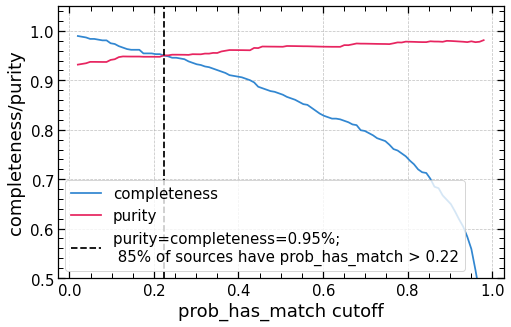

In [9]:
assess_goodnes_nway_cross_match(nway_res_ero);

 Completeness = 96% 
 Purity = 96% 
 prob_has_match optimal cutoff =  0.28 
 Fraction of sources with prob_has_match > 0.28 = 82%
 NOT HOSTLESS 
assigned NOT HOSTLESS: 637
assigned NOT HOSTLESS with correct match: 609
total: 667
purity [assigned NOT HOSTLESS correctly / all NOT HOSTLESS]: 0.9560439560439561
completeness [all NOT HOSTLESS / total NOT HOSTLESS]: 0.9550224887556222
 HOSTLESS 
assigned HOSTLESS: 12
assigned HOSTLESS correctly: 12
total HOSTLESS: 15
purity [assigned HOSTLESS correctly / all assigned HOSTLESS]: 1.0
completeness [all HOSTLESS assigned / total HOSTLESS]: 0.8


,EROSITA,DESI,Separation_EROSITA_DESI,Separation_max,ncat,dist_bayesfactor_uncorrected,dist_bayesfactor,dist_post,bias_DESI_nnmag_grz,bias_DESI_nnmag_grzw1,bias_DESI_nnmag_grzw1w2,bias_DESI_rel_dered_mag_g,bias_DESI_rel_dered_mag_r,bias_DESI_rel_dered_mag_z,bias_DESI_rel_dered_g_r,bias_DESI_rel_dered_r_z,bias_DESI_rel_dered_g_z,p_single,match_flag,prob_has_match,prob_this_match,ID,RA,DEC,pos_err,ML_FLUX_0,desi_id_true_ctp,desi_id,ra,dec,rel_dered_mag_g,rel_dered_mag_r,rel_dered_mag_z,rel_dered_mag_w1,rel_dered_mag_w2,rel_dered_mag_w3,rel_dered_mag_w4,rel_dered_g_r,rel_dered_r_z,rel_dered_g_z,rel_dered_z_w1,rel_dered_r_w2,rel_dered_w1_w2,rel_dered_z_w3,rel_dered_r_w4,rel_dered_w3_w4,prior_type,nnmag_grzw1w2,nnmag_grzw1w2_orig,nnmag_grzw1,nnmag_grzw1_orig,nnmag_grz,nnmag_grz_orig,rel_dered_mag_g_orig,rel_dered_mag_r_orig,rel_dered_mag_z_orig,rel_dered_mag_w1_orig,rel_dered_mag_w2_orig,rel_dered_mag_w3_orig,rel_dered_mag_w4_orig,rel_dered_g_r_orig,rel_dered_r_z_orig,rel_dered_g_z_orig,rel_dered_z_w1_orig,rel_dered_r_w2_orig,rel_dered_w1_w2_orig,rel_dered_z_w3_orig,rel_dered_r_w4_orig,rel_dered_w3_w4_orig
629,39,193604,0.423018,0.423018,2,11.080959,11.080959,0.980542,1.0,1.000000,0.557331,1.000000,1.0,1.000000,1.0,1.0,1.000000,0.965619,1,0.968086,0.925895,b'SRGe J104117.7+584929',160.323629,58.824642,0.774481,2.361506e-13,9011_613766_43,9011_613766_39,160.323494,58.824548,-99.000000,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.0,-99.0,-99.000000,-99.000000,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,b'grzw1w2',0.308889,0.308889,-99.000000,0.590108,-99.0,0.612539,21.617065,20.071016,18.908691,18.014496,18.534338,NaN,NaN,1.546049,1.162325,2.708374,0.894195,1.536678,-0.519842,NaN,NaN,NaN
712,44,1445,0.616340,0.616340,2,11.009321,11.009321,0.977133,1.0,1.000000,6.358828,1.000000,1.0,1.000000,1.0,1.0,1.000000,0.996333,1,0.996333,1.000000,b'SRGe J103618.3+581246',159.076205,58.212688,0.774599,2.214497e-13,9011_612250_2743,9011_612250_2743,159.076381,58.212831,-99.000000,-99.0,-99.000000,-99.000000,-99.000000,0.406921,0.432017,-99.0,-99.0,-99.000000,-99.000000,-99.0,-99.000000,0.020576,-0.137129,-0.087835,b'grzw1w2',0.856201,0.856201,-99.000000,0.933834,-99.0,0.759039,13.252994,13.749300,14.448002,11.917317,12.584514,14.242238,15.120586,-0.496306,-0.698702,-1.195008,2.530685,1.164786,-0.667197,0.205764,-1.371286,-0.878348
927,59,42150,0.846638,0.846638,2,10.870823,10.870823,0.968811,1.0,1.000000,29.373988,1.000000,1.0,1.000000,1.0,1.0,1.000000,0.998905,1,0.998905,0.999981,b'SRGe J105316.7+573551',163.319421,57.597379,0.813768,1.725409e-13,9011_609950_3809,9011_609950_3809,163.319852,57.597425,-99.000000,-99.0,-99.000000,-99.000000,-99.000000,0.470493,0.412812,-99.0,-99.0,-99.000000,-99.000000,-99.0,-99.000000,0.206193,0.413926,0.201885,b'grzw1w2',0.962702,0.962702,-99.000000,0.930767,-99.0,0.536829,19.056164,18.587671,18.529188,17.950235,17.488895,16.467258,14.448413,0.468493,0.058483,0.526976,0.578953,1.098776,0.461340,2.061930,4.139258,2.018845
986,63,176,1.209399,1.209399,2,10.630145,10.630145,0.946941,1.0,1.000000,1.000000,24.780262,1.0,4.977282,1.0,1.0,17.452079,0.999974,1,0.999974,0.999957,b'SRGe J105300.9+574208',163.253903,57.702143,0.816646,1.645794e-13,9011_610726_375,9011_610726_375,163.254487,57.702268,0.311216,-99.0,0.399685,0.312928,0.321008,0.392139,-99.000000,-99.0,-99.0,-0.309639,0.303649,-99.0,-0.028282,0.026411,-99.000000,-99.000000,b'None',-99.000000,-99.000000,-99.000000,-99.000000,-99.0,-99.000000,10.892570,NaN,13.988961,10.952471,11.235287,13.724852,NaN,NaN,NaN,-3.096391,3.036490,NaN,-0.282816,0.264109,NaN,NaN
1175,77,104087,0.531212,0.531212,2,10.993143,10.993143,0.976285,1.0,1.000000,1.369975,1.000000,1.0,1.000000,1.0,1.0,1.000000,0.982578,1,0.982578,1.000000,b'SRGe J104144.5+594258',160.435424,59.716091,0.835654,1.462046e-13,9011_616727_1391,9011_616727_1391,160.435399,59.715943,-99.000000,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.0,-99.0,-99.000000,-99.000000,-99

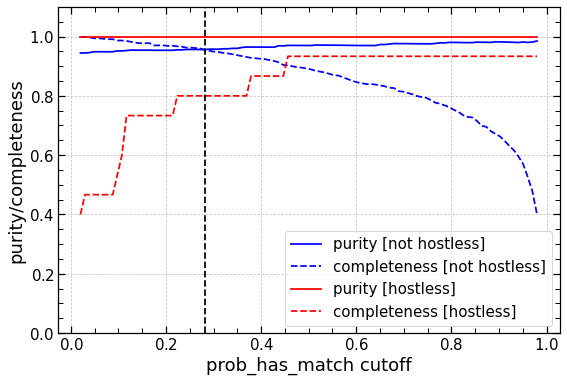

In [11]:
assess_goodnes_of_cross_match(nway_res_ero)